In [1]:
import pyanitools as pyt
import pyaniasetools as aat
import hdnntools as hdt
import numpy as np

In [14]:
#----------------Parameters--------------------
mol = '/home/jujuman/Research/Test/check_data2/ad_O15H30_03-090.dat'

#wkdir = '/home/jujuman/Research/DataReductionMethods/model6r/model-gdb_r06_comb09_1/cv4/'
#cnstfile = wkdir + 'rHCNO-4.6A_16-3.1A_a4-8.params'
#saefile  = wkdir + 'sae_6-31gd.dat'
#nnfdir   = wkdir + '/train'

wkdir = '/home/jujuman/Research/DataReductionMethods/al_working_network/ANI-AL-0808.0302.0408/'
cnstfile = wkdir + 'train0/rHCNOSFCl-4.6A_16-3.1A_a4-8.params'
saefile  = wkdir + 'train0/sae_wb97x-631gd.dat'
nnfdir   = wkdir + 'train'

Nn = 5
#----------------------------------------------

In [15]:
# Define the conformer cross validator class
anicv = aat.anicrossvalidationconformer(cnstfile,saefile,nnfdir,Nn,0,False)

In [16]:
data = hdt.readncdatall(mol)

In [17]:
# Extract the data
X  = data['coordinates']
S  = data['species']
Edft = hdt.hatokcal*data['energies']
Fdft = hdt.hatokcal*data['forces']#/(0.52917724900001*0.52917724900001)

# Calculate std. dev. per atom for all conformers
sigma = anicv.compute_stddev_conformations(X, S)

# Calculate energy deltas
Eani, Fani = anicv.compute_wa_energy_conformations(X, S)
print(Fani.shape)
#Eani = np.mean(Eani,axis=0)

(90, 45, 3)


In [18]:
print(sigma)

[ 0.28598893  0.21087338  0.16978268  0.17192691  0.34249101  0.24573421
  0.13846081  0.22937249  0.2894485   0.4616271   0.48819973  0.40401044
  0.26382631  0.2675728   0.20415617  0.48022295  0.34695139  0.29583478
  0.63784158  0.26978929  0.35511142  0.36438151  0.20601971  0.22729887
  0.23509644  0.20781542  0.17508456  0.17014151  0.29837857  0.48470533
  0.63736981  0.26809003  0.35429336  0.4219355   0.32731793  0.24630504
  0.31128942  0.18110333  0.36697041  0.3584394   0.18381897  0.23901692
  0.22819983  0.3496189   0.4616271   0.23748158  0.3451207   0.3952822
  0.36742195  0.42208249  0.20810213  0.25150653  0.46352615  0.26355131
  0.31122952  0.36631378  0.28373031  0.26979317  0.54403524  0.33612209
  0.27877058  0.40623163  0.42785815  0.26016856  0.20361515  0.22249495
  0.30696147  0.28102051  0.33528067  0.15105401  0.2334603   0.29767875
  0.20598778  0.3312323   0.27271807  0.44605802  0.42033426  0.34299279
  0.22259711  0.4970247   0.29364946  0.25146503  0.

In [19]:
for i,(e,s) in enumerate(zip(np.abs(Eani-Edft),sigma)):
    print(i,e,s)

0 7.52109948662 0.285988932443
1 0.637729088659 0.210873379822
2 2.01933286304 0.16978268423
3 1.76073012641 0.17192691415
4 1.89313007484 0.342491007185
5 3.65748159494 0.245734206051
6 0.724719906226 0.138460808483
7 0.924479759997 0.2293724942
8 2.27956459299 0.289448497761
9 2.82261835819 0.461627102152
10 7.11057840439 0.48819973068
11 4.59113875392 0.404010441713
12 1.48305639112 0.263826313738
13 3.12257868715 0.267572800314
14 0.915244656731 0.204156167275
15 1.58328019083 0.48022295379
16 5.27683644812 0.346951393744
17 5.35909997323 0.295834781196
18 4.58116113383 0.6378415819
19 3.45182033966 0.269789292961
20 1.54766141064 0.355111423776
21 1.47123631299 0.364381505848
22 2.83498342184 0.206019705507
23 1.90181092883 0.227298874028
24 1.26704284619 0.235096436182
25 6.65750167542 0.207815419756
26 2.58128310647 0.175084557904
27 1.13122563064 0.170141509914
28 6.08227693185 0.29837857377
29 3.49383566086 0.484705327379
30 2.62598355545 0.63736981023
31 0.213475898723 0.2680

In [8]:
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/home/jujuman/.local/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


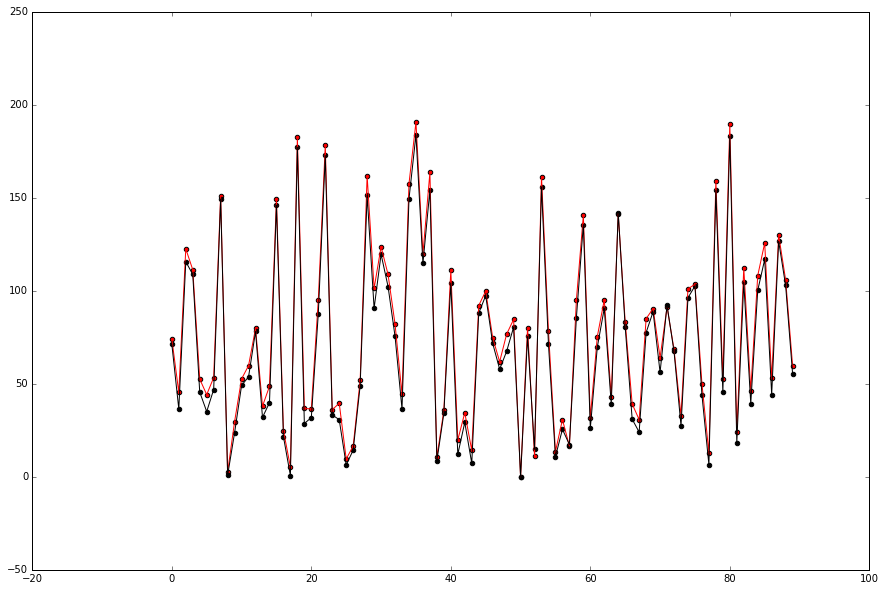

In [9]:
#Eani = -0.5*(Eani)
#Edft = -0.5*(Edft)
#Emp2 = -0.5*(Emp2)

Eani = Eani - Eani.min()
Edft = Edft - Edft.min()

%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

plt.scatter(np.arange(Eani.size),Eani,c='r')
plt.plot(np.arange(Eani.size),Eani,c='r')
plt.scatter(np.arange(Edft.size),Edft,c='black')
plt.plot(np.arange(Edft.size),Edft,c='black')
plt.show()

Populating the interactive namespace from numpy and matplotlib


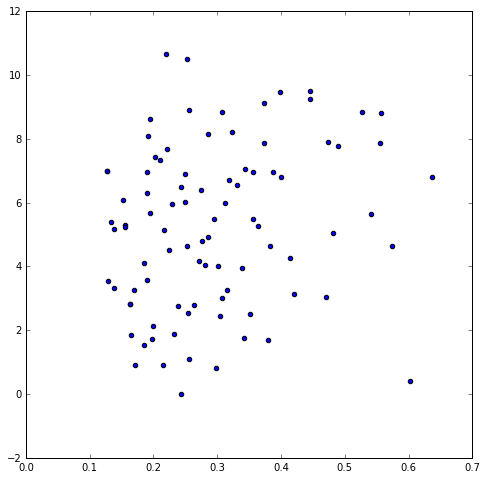

In [10]:
%pylab inline
pylab.rcParams['figure.figsize'] = (8, 8)
plt.scatter(sigma,np.abs(Eani-Edft))
plt.show()

Populating the interactive namespace from numpy and matplotlib


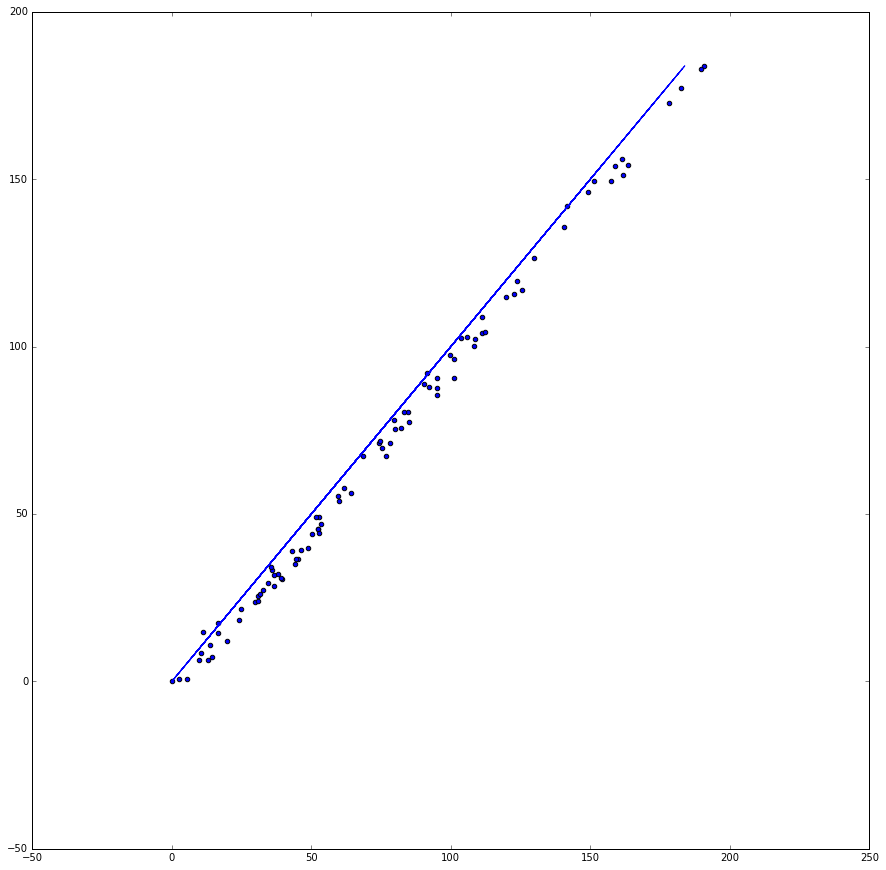

In [11]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 15)
plt.plot(Edft,Edft)
plt.scatter(Eani,Edft)
plt.show()

In [12]:
print(hdt.calculaterootmeansqrerror(Edft,Eani))
print(hdt.calculatemeanabserror(Edft,Eani))

5.84646534031
5.25671732587


In [13]:
print(hdt.calculaterootmeansqrerror(Fdft.flatten(),Fani.flatten()))
print(hdt.calculatemeanabserror(Fdft.flatten(),Fani.flatten()))

4.02931
2.72794
